## Human de novo mutations

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
from scipy import stats

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from scipy import stats
# import statsmodels.formula.api as smf
# import statsmodels.api as sm

### Load data

In [2]:
# Load data on the number and parental origin of each de novo mutation in a proband
dnm_data = pd.read_csv("aau1043_dnm.tsv")

# Load data on the ages of the parents of each proband
parental_age_data = pd.read_csv("aau1043_parental_age.tsv")

In [3]:
# Get DNM data for each proband by parental origin
dnm_probands = pd.DataFrame({"Proband_id": dnm_data.groupby("Proband_id").size().index, 
              "pat_dnm": dnm_data.loc[dnm_data["Phase_combined"] == "father"].groupby("Proband_id").size().values, 
              "mat_dnm": dnm_data.loc[dnm_data["Phase_combined"] == "mother"].groupby("Proband_id").size().values, 
              "tot_dnm": dnm_data.groupby("Proband_id").size().values,
})

# Add data on parental ages
dnm_probands = pd.merge(dnm_probands, parental_age_data, on = "Proband_id")

dnm_probands

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,675,51,19,70,31,36
1,1097,26,12,39,19,19
2,1230,42,12,57,30,28
3,1481,53,14,68,32,20
4,1806,61,11,78,38,34
...,...,...,...,...,...,...
391,153657,41,8,49,27,23
392,154565,61,14,75,36,30
393,154621,39,11,50,19,18
394,154810,55,14,69,32,28


## Plot DNM counts vs. parental age

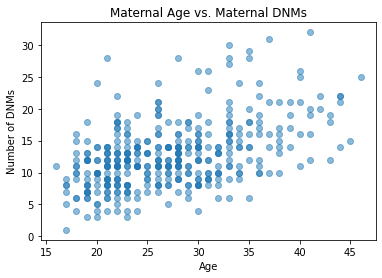

In [4]:
# Plot the count of maternal DNMs vs. maternal age
fig, ax = plt.subplots()
ax.scatter(dnm_probands["Mother_age"], dnm_probands["mat_dnm"], alpha = 0.5)

# Add title and axis labels
ax.set_title("Maternal Age vs. Maternal DNMs")
ax.set_xlabel("Age")
ax.set_ylabel("Number of DNMs")

plt.show()

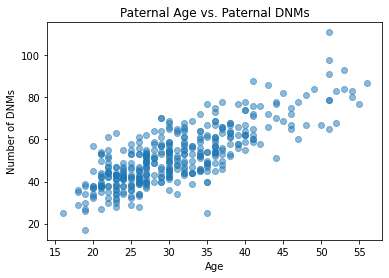

In [5]:
# Plot the count of paternal DNMs vs. paternal age
fig, ax = plt.subplots()
ax.scatter(dnm_probands["Father_age"], dnm_probands["pat_dnm"], alpha = 0.5)

# Add title and axis labels
ax.set_title("Paternal Age vs. Paternal DNMs")
ax.set_xlabel("Age")
ax.set_ylabel("Number of DNMs")

plt.show()

## Ordinary least squares

In [6]:
# Test for an association between maternal age and maternally inherited de novo mutations
model = smf.ols(formula = "mat_dnm ~ Mother_age", data = dnm_probands)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        15:23:52   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This relationship appears to be significant because the p-value is less than 0.05. For every year increase in the mother's age, the chance of a maternally inherited DNM goes up by 0.3776.

In [7]:
# Test for an association between paternal age and paternally inherited de novo mutations
model = smf.ols(formula = "pat_dnm ~ Father_age", data = dnm_probands)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        15:23:52   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This relationship appears to be significant because the p-value is less than 0.05. For every year increase in the father's age, the chance of a paternally inherited DNM goes up by 1.3538.

## Plot DNMs per proband

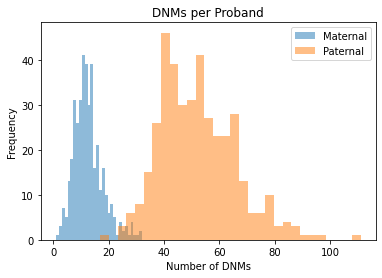

In [8]:
# Plot the number of maternal and paternal DNMs per proband
fix, ax = plt.subplots()

ax.hist(dnm_probands["mat_dnm"], label = "Maternal", bins = 30, alpha = 0.5)
ax.hist(dnm_probands["pat_dnm"], label = "Paternal", bins = 30, alpha = 0.5)

# Add title, axis labels, and legend
ax.set_title("DNMs per Proband")
ax.set_xlabel("Number of DNMs")
ax.set_ylabel("Frequency")

ax.legend(loc = "upper right")
plt.show()

## Maternally inherited vs. paternally inherited DNMs

In [9]:
# t-test between the number of maternally and paternally interited DNMs per proband
stats.ttest_ind(dnm_probands["mat_dnm"], dnm_probands["pat_dnm"])

Ttest_indResult(statistic=-53.403565287269245, pvalue=2.1986031793078793e-264)

The p-value is extremely close to 0, so there appears to be a significant difference between the number of maternally inherited DNMs and paternally inherited DNMs.

## Poisson Regression

In [10]:
# Test for an association between maternal age and maternally inherited de novo mutations
model = smf.poisson(formula = "mat_dnm ~ Mother_age", data = dnm_probands)

results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:23:52   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [11]:
# Test for an association between paternal age and paternally inherited de novo mutations
model = smf.poisson(formula = "pat_dnm ~ Father_age", data = dnm_probands)

results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:23:52   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [12]:
# Predict the number of paternal DNMs for a proband whose father was 50.5 years old when the proband was born
new_obs = pd.DataFrame({"Father_age": [50.5]})

results.predict(new_obs)

0    82.031316
dtype: float64